In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#import dataframe_image as dfi

from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('EPL_GW4_standard.csv')
df_fix=pd.read_csv('EPL_fixture.csv')

In [3]:
team_abb={'Everton':'EVE', 'Aston Villa':'AVL',
          'Leicester City':'LEI', 'Arsenal':'ARS',
          'Liverpool':'LIV','Tottenham':'TOT', 
          'Chelsea':'CHE', 'Leeds United':'LEE', 
          'Newcastle Utd':'NEW','West Ham':'WHU', 
          'Southampton':'SOU', 'Crystal Palace':'CRY', 
          'Wolves':'WOL','Manchester City':'MCI', 
          'Brighton':'BHA', 'Manchester Utd':'MUN', 
          'West Brom':'WBA','Burnley':'BUR', 
          'Sheffield Utd':'SHU', 'Fulham':'FUL'}

In [4]:
#Name to abb
df.Squad=df.Squad.apply(lambda x: team_abb[x])

In [5]:
#xG and xGA per match home and away 
df['xGpm_h']=df.xG_h/df.MP_h
df['xGpm_a']=df.xG_h/df.MP_a
df['xGApm_h']=df.xGA_h/df.MP_h
df['xGApm_a']=df.xGA_h/df.MP_a

In [6]:
#Aggregate data
df['MP']=df['MP_h']+df['MP_a']
df['xG']=df['xG_h']+df['xG_a']
df['xGA']=df['xGA_h']+df['xGA_a']
df['delta_xG']=df['xG']-df['xGA']
df['GF']=df.GF_a+df.GF_h
df['GA']=df.GA_a+df.GA_h
df['xaG']=df.GF-df.xG
df['xaGA']=df.xGA-df.GA

#Aggregate per match
df['xGpm']=df['xG']/df['MP']
df['xGApm']=df['xGA']/df['MP']
df['delta_xGpm']=df['delta_xG']/df['MP']
df['GFpm']=df.GF/df.MP
df['GApm']=df.GA/df.MP
df['xaGpm']=df.xaG/df.MP
df['xaGApm']=df.xaGA/df.MP

### Home Vs Away

Out of the 38 matches played so far, 19 resulted in the away team winning, 3 were draws and the Home team only managed to win 16 matches which is around 42% of the total matches played.

Total Matches : 38
Home Team Win : 16
Away Team Win : 19
Draw : 3


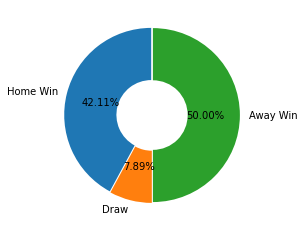

In [7]:
print("Total Matches : {}".format(df.MP_h.sum()))
print("Home Team Win : {}".format(df.W_h.sum()))
print("Away Team Win : {}".format(df.L_h.sum()))
print("Draw : {}".format(df.D_h.sum()))
x=[df.W_h.sum(), df.D_h.sum(), df.L_h.sum()]
labels=["Home Win", "Draw", "Away Win"]
explode=[0.01,0.01,0.01]

plt.pie(x=x, labels=labels,explode=explode, startangle=90,
        autopct='%1.2f%%',wedgeprops={"width":0.6})
#plt.savefig('h_vs_a.png')
plt.show()

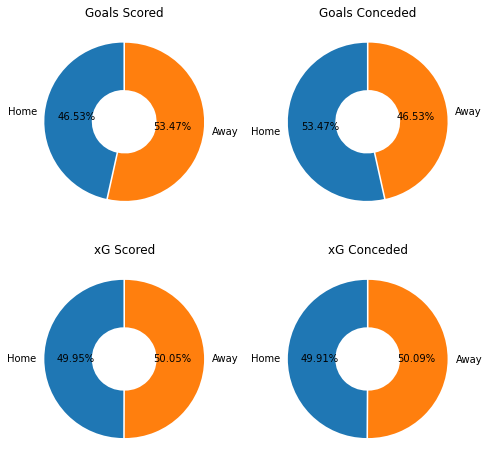

In [8]:
labels=["Home","Away"]
explode=[0.01,0.01]
plt.figure(figsize=(8,8))
plt.subplot(221)
plt.title("Goals Scored")
x=[sum(df.GF_h),sum(df.GF_a)]
plt.pie(x=x, labels=labels,explode=explode, startangle=90,
        autopct='%1.2f%%',wedgeprops={"width":0.6})

plt.subplot(222)
plt.title("Goals Conceded")
x=[sum(df.GA_h),sum(df.GA_a)]
plt.pie(x=x, labels=labels,explode=explode, startangle=90,
        autopct='%1.2f%%',wedgeprops={"width":0.6})

plt.subplot(223)
plt.title("xG Scored")
x=[sum(df.xG_h),sum(df.xG_a)]
plt.pie(x=x, labels=labels,explode=explode, startangle=90,
        autopct='%1.2f%%',wedgeprops={"width":0.6})

plt.subplot(224)
plt.title("xG Conceded")
x=[sum(df.xGA_h),sum(df.xGA_a)]
plt.pie(x=x, labels=labels,explode=explode, startangle=90,
        autopct='%1.2f%%',wedgeprops={"width":0.6})
#plt.savefig('pie_xg.png')
plt.show()

Home teams have been outscored by away teams this season. Moreover, home teams have underperformed in both xG(Expected Goals Scored) and xGA(Expected Goals Conceded).

Average xG per match(Home) : 1.375
Average xG per match(Away) : 1.51
Average xG Conceaded per match(Home) : 1.42
Average xG Conceaded per match(Away) : 1.54


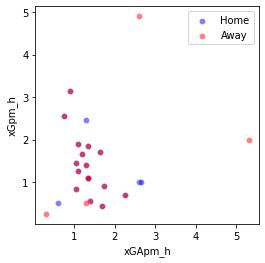

In [9]:
print("Average xG per match(Home) : {}"
     .format(df.xGpm_h.mean()))
print("Average xG per match(Away) : {}"
     .format(df.xGpm_a.mean()))
print("Average xG Conceaded per match(Home) : {}"
     .format(round(df.xGApm_h.mean(),2)))
print("Average xG Conceaded per match(Away) : {}"
     .format(round(df.xGApm_a.mean(),2)))

plt.figure(figsize=(4,4))
sns.scatterplot(data=df,x='xGApm_h', y='xGpm_h', 
                color='blue', label='Home', alpha=0.5)
sns.scatterplot(data=df,x='xGApm_a', y='xGpm_a', 
                color='red', label='Away', alpha=0.5)
plt.show()

In [10]:
df_agg=df[['Squad','MP', 'xG','xGA', 'delta_xG', 'xGpm', 'xGApm',
           'delta_xGpm']]
df_agg.sort_values(by='delta_xGpm', ascending=False)

,Squad,MP,xG,xGA,delta_xG,xGpm,xGApm,delta_xGpm
0,EVE,4,8.6,2.9,5.7,2.150000,0.725000,1.425000
5,TOT,4,9.6,4.9,4.7,2.400000,1.225000,1.175000
1,AVL,3,6.5,3.3,3.2,2.166667,1.100000,1.066667
4,LIV,4,10.6,6.7,3.9,2.650000,1.675000,0.975000
9,WHU,4,6.4,3.9,2.5,1.600000,0.975000,0.625000
14,BHA,4,6.6,4.5,2.1,1.650000,1.125000,0.525000
6,CHE,4,7.1,5.1,2.0,1.775000,1.275000,0.500000
2,LEI,4,6.6,5.0,1.6,1.650000,1.250000,0.400000
10,SOU,4,4.2,3.8,0.4,1.050000,0.950000,0.100000
3,ARS,4,4.7,5.3,-0.6,1.175000,1.325000,-0.150000


### Expected Goals Scored and Conceaded

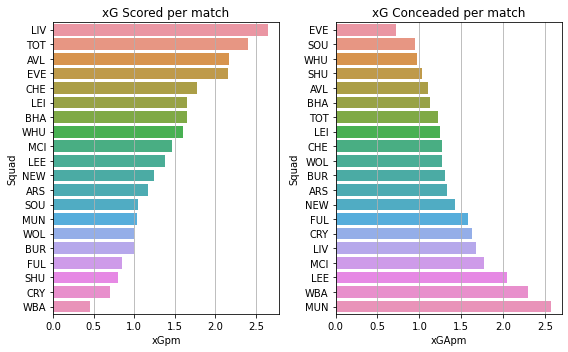

In [11]:
plt.figure(figsize=(8,5))
#plt.suptitle("EPL 2020/21 SEASON UPTO GW4")

plt.subplot(1,2,1)
plt.title("xG Scored per match")
sns.barplot(orient='h', x='xGpm',y='Squad',
            data=df_agg.sort_values(by='xGpm',ascending=False))
plt.grid(which='both', axis='x')

plt.subplot(1,2,2)
plt.title("xG Conceaded per match")
sns.barplot(orient='h', x='xGApm',y='Squad',
            data=df_agg.sort_values(by='xGApm',ascending=True))
plt.grid(which='both', axis='x')

plt.tight_layout()
#plt.savefig('xg_xa.png')
plt.show()

The defending champions Liverpool is leading in expected goals per game with around 2.5 xG per game including penalties. Spurs, Aston Villa and Everton have also managed xG greater than 2.

West Brom which is currently the lowest ranking team is struggling to create chances with very low xG.
Teams with low xG lack creativity, they should reinforce the team with creative players.
xG can be low for teams that employ a defensive style of play that relies on counter attacks or mistakes from the opposition to score goals.

Everton, Southampton and West Ham seem to have impenetrable defense registering xGA below 1. Sheffield, Aston Villa and Brighton have also displayed solid defense.

3 out of last season’s top four teams-Liverpool, Manchester City and Manchester United features in the worst 5 defensive teams as per xG conceded. Manchester United recorded the highest expected goals conceded averaging around 2.5 goals per game. Leeds and West Brom also have more than 2 xGA.

Teams with high xGA should immediately address their problems in defense.

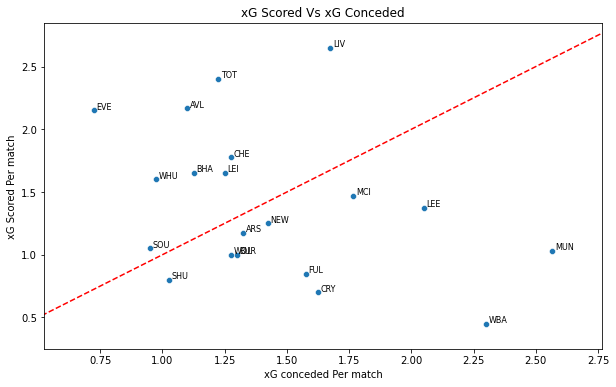

In [12]:
plt.figure(figsize=(10,6))
plt.title("xG Scored Vs xG Conceded")
sns.scatterplot(data=df_agg, x='xGApm', y='xGpm')
for i in range(df_agg.shape[0]):
    plt.text(df_agg.xGApm[i]+0.01, df_agg.xGpm[i]+0.01, 
             df_agg.Squad[i], fontdict={'fontsize':8})
plt.xlabel("xG conceded Per match")
plt.ylabel("xG Scored Per match")
plt.plot([0,3],[0,3],'r--')
plt.xlim(df_agg.xGApm.min()-0.2,df_agg.xGApm.max()+0.2)
plt.ylim(df_agg.xGpm.min()-0.2,df_agg.xGpm.max()+0.2)
#plt.savefig('scatter_xg_xa.png')
plt.show()

The teams above the red line have better xG compared to xGA. Last season’s top scorers Manchester City who usually dominates the league, has failed to produce more chances than their opponents. Their city rivals Manchester United had the worst start in decades.

### Net expected Goals Scored

Delta xG is the difference between expected goals scored and expected goals conceded which can be used to evaluate the form of a team. Everton seems to dominate the league with delta xG per game almost 1.5. Tottenham and Aston Villa also have delta xG more than 1. Despite 7–2 humiliation at the hands of Aston Villa, the Reds are close behind in the 4th position. On the other end, Manchester United and West Brom have delta xG of more than 1.5.

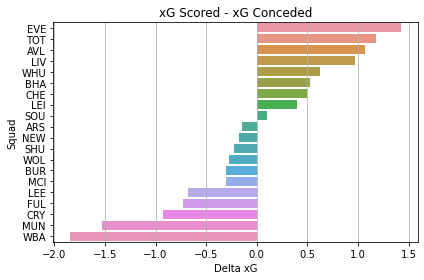

In [13]:
plt.figure(figsize=(6,4))
plt.title("xG Scored - xG Conceded")
sns.barplot(orient='h', x='delta_xGpm',y='Squad', 
            data=df_agg.sort_values(by='delta_xGpm', ascending=False))
plt.grid(which='both', axis='x')
plt.xlabel('Delta xG')
plt.tight_layout()
#plt.savefig('delta_xg.png')
plt.show()

### Actual Vs Expected Goals For and Against

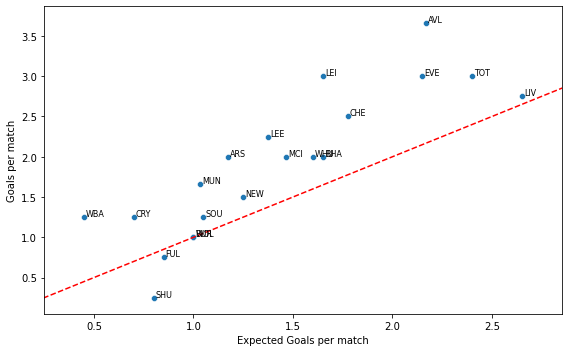

In [14]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x=df.xGpm, y=df.GFpm)
for i in range(df.shape[0]):
    plt.text(x=df.xGpm[i]+0.01, y=df.GFpm[i]+0.01, 
             s=df.Squad[i], fontsize=8)
plt.plot([-3,3],[-3,3],'r--')
plt.xlabel("Expected Goals per match")
plt.ylabel("Goals per match")
plt.xlim(df.xGpm.min()-0.2, df.xGpm.max()+0.2)
plt.ylim(df.GFpm.min()-0.2, df.GFpm.max()+0.2)
plt.tight_layout()
#plt.savefig('expvsact_g.png')
plt.show()

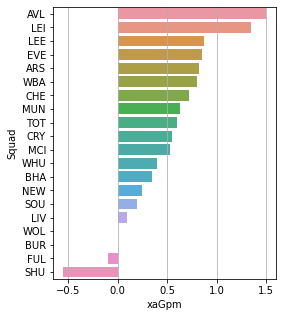

In [15]:
plt.figure(figsize=(4,5))
sns.barplot(orient='h', y='Squad',x='xaGpm', 
            data=df.sort_values(by='xaGpm', ascending=False))
plt.grid(which='both', axis='x')
#plt.savefig('expvsact_gbar.png')
plt.show()

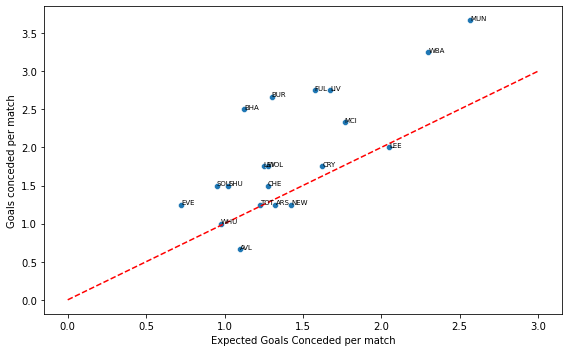

In [16]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x=df.xGApm, y=df.GApm)
for i in range(df.shape[0]):
    plt.text(x=df.xGApm[i], y=df.GApm[i], 
             s=df.Squad[i], fontsize=7)
plt.plot([0,3],[0,3],'r--')
plt.xlabel('Expected Goals Conceded per match')
plt.ylabel('Goals conceded per match')
plt.tight_layout()
#plt.savefig('xaGA.png')
plt.show()

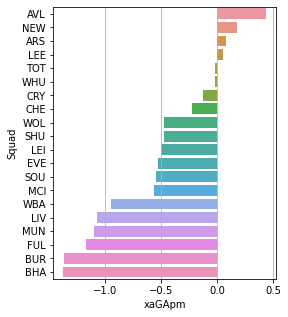

In [17]:
plt.figure(figsize=(4,5))
sns.barplot(orient='h', y='Squad',x='xaGApm', 
            data=df.sort_values(by='xaGApm', ascending=False))
plt.grid(which='both', axis='x')
#plt.savefig('xaGA_b.png')
plt.show()

### Quadrant Analysis

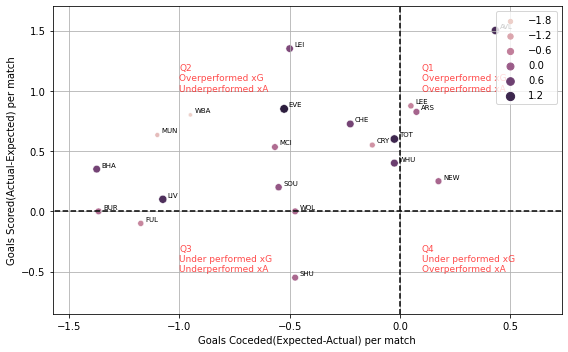

In [18]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='xaGApm', y='xaGpm', data=df, hue='delta_xGpm',
                size='delta_xGpm')
plt.grid(which='both')
plt.legend()
plt.plot([5,-5],[0,0], 'k--')
plt.plot([0,0],[5,-5], 'k--')
plt.xlim(df.xaGApm.min()-0.2,df.xaGApm.max()+0.3)
plt.ylim(df.xaGpm.min()-0.3,df.xaGpm.max()+0.2)
for i in range(df.shape[0]):
    plt.text(x=df.xaGApm[i]+0.02, y=df.xaGpm[i]+0.02, 
             s=df.Squad[i], fontsize=7)
    
plt.text(x=0.1, y=1, s="Q1\nOverperformed xG\nOverperformed xA", 
         alpha=0.7,fontsize=9, color='red')
plt.text(x=0.1, y=-0.5, s="Q4\nUnder performed xG\nOverperformed xA", 
         alpha=0.7,fontsize=9, color='red')
plt.text(x=-1, y=1, s="Q2\nOverperformed xG\nUnderperformed xA", 
         alpha=0.7,fontsize=9, color='red')
plt.text(x=-1, y=-0.5, s="Q3\nUnder performed xG\nUnderperformed xA", 
         alpha=0.7,fontsize=9, color='red')
plt.xlabel("Goals Coceded(Expected-Actual) per match")
plt.ylabel("Goals Scored(Actual-Expected) per match")
plt.tight_layout()
#plt.savefig('op_up.png')
plt.show()

The size of the bubble indicates the expected net goals scored(xG-xGA) per match. The first aim of the teams should be to improve the net goals scored.

1st Quadrant: Over-performed xG and Over-performed xGA
Teams in Q1 are doing well in over performing expected goals they have to carry on the momentum teams like Leeds and New Castle should try to improve the net Goals scored.

2nd Quadrant: Over-performed xG and Under-performed xGA
Teams in Q2 should try to move towards Q1, which is to improve the defense.

3rd Quadrant: Under-performed xG and Under-performed xGA
Teams in Q3 should improve both defense and attack.

4th Quadrant: Under-performed xG and Over-performed xGA
There are no teams in Q4.

### Prediction

The logic used to predict the scores of the match is based on xG per game and xGA per game for the previous period.

The home team’s score is calculated as the average of xG of the home team and xGA of the away team.
G_home=(xG_home+xGA_away)/2

The away team’s score is calculated as the average of xG of the away team and xGA of the home team.
G_away=(xG_away+xGA_home)/2

Goal Difference(GD) is calculated as the difference between the home team’s score and the away team’s score.
GD=G_home-G_away

Total goals scored(GS) is calculated as the sum of the home team’s score and away team’s score.
GD=G_home+G_away

In [19]:
#Name Preprocess
df_fix.Home=df_fix.Home.apply(lambda x: team_abb[x])
df_fix.Away=df_fix.Away.apply(lambda x: team_abb[x])

df_fix['G_home']=0.0
df_fix['G_away']=0.0

for i in range(df_fix.shape[0]):
    df_fix.G_home[i]=(df_agg.xGpm[df_agg.Squad==df_fix.Home[i]].sum()+
                   df_agg.xGApm[df_agg.Squad==df_fix.Away[i]].sum())/2
    df_fix.G_away[i]=(df_agg.xGpm[df_agg.Squad==df_fix.Away[i]].sum()+
                   df_agg.xGApm[df_agg.Squad==df_fix.Home[i]].sum())/2

df_fix['GD']=df_fix['G_home']-df_fix['G_away']
df_fix['GS']=df_fix['G_home']+df_fix['G_away']
df_fix=df_fix.sort_values(by='GD', ascending=False)
df_styled=df_fix.iloc[:,1:][df_fix.GW==5].style.background_gradient(cmap='RdYlGn',subset=['GD','GS']).hide_index()
#dfi.export(df_styled,"mytable.png")
df_styled

Home,Away,G_home,G_away,GD,GS
NEW,MUN,1.908333,1.229167,0.679167,3.137500
TOT,WHU,1.687500,1.412500,0.275000,3.100000
SHU,FUL,1.187500,0.937500,0.250000,2.125000
EVE,LIV,1.912500,1.687500,0.225000,3.600000
CHE,SOU,1.362500,1.162500,0.200000,2.525000
MCI,ARS,1.395833,1.470833,-0.075000,2.866667
LEE,WOL,1.325000,1.525000,-0.200000,2.850000
LEI,AVL,1.375000,1.708333,-0.333333,3.083333
CRY,BHA,0.912500,1.637500,-0.725000,2.550000
WBA,BUR,0.875000,1.650000,-0.775000,2.525000


The higher the absolute value of Goal Difference, the more one-sided the match would be and the value of Goal Difference closer to zero means an evenly contested match can be expected.
The negative value of GD implies that the Away team is likely to win and the positive value favors the home team to win.
A higher value of Goals Scored implies that we can expect a goal fest from the fixture and a lower value indicates a low scoring match.
Based on the model, Burnley has the best fixture away against West Brom with a goal difference of 0.77 in favor of the Clarets.

In [20]:
df_styled=df_fix.iloc[:,1:][df_fix.GW==6].style.background_gradient(cmap='RdYlGn',subset=['GD','GS']).hide_index()
#dfi.export(df_styled,"mytable.png")
df_styled

Home,Away,G_home,G_away,GD,GS
BHA,WBA,1.975000,0.787500,1.187500,2.762500
AVL,LEE,2.108333,1.237500,0.870833,3.345833
LIV,SHU,1.837500,1.237500,0.600000,3.075000
WHU,MCI,1.683333,1.220833,0.462500,2.904167
FUL,CRY,1.237500,1.137500,0.100000,2.375000
WOL,NEW,1.212500,1.262500,-0.050000,2.475000
ARS,LEI,1.212500,1.487500,-0.275000,2.700000
SOU,EVE,0.887500,1.550000,-0.662500,2.437500
BUR,TOT,1.112500,1.850000,-0.737500,2.962500
MUN,CHE,1.154167,2.170833,-1.016667,3.325000


In [21]:
df_result=pd.read_csv("EPL_result.csv")
df_result=df_result[df_result.GW==5]

#Name Preprocess
df_result.Home=df_result.Home.apply(lambda x: team_abb[x])
df_result.Away=df_result.Away.apply(lambda x: team_abb[x])
df_result.head()

,GW,Home,Away,act_xG_Home,act_xG_Away,act_G_Home,act_G_Away
38,5,EVE,LIV,1.3,2.2,2,2
39,5,CHE,SOU,2.0,2.2,3,3
40,5,MCI,ARS,1.4,0.9,1,0
41,5,NEW,MUN,0.5,2.7,1,4
42,5,SHU,FUL,1.4,1.9,1,1


In [22]:
df_result['Match']=df_result.Home+" Vs "+df_result.Away
df_result["act_GD"]=df_result.act_G_Home-df_result.act_G_Away
df_result["act_xGD"]=df_result.act_xG_Home-df_result.act_xG_Away
df_result["pred_xG_Home"]=df_result.Home\
.apply(lambda x:df_fix.G_home[df_fix.Home==x][df_fix.GW==5].sum())
df_result["pred_xG_Away"]=df_result.Home\
.apply(lambda x:df_fix.G_away[df_fix.Home==x][df_fix.GW==5].sum())
df_result["pred_xGD"]=df_result.Home\
.apply(lambda x:df_fix.GD[df_fix.Home==x][df_fix.GW==5].sum())

In [23]:
df_result.head()

,GW,Home,Away,act_xG_Home,act_xG_Away,act_G_Home,act_G_Away,Match,act_GD,act_xGD,pred_xG_Home,pred_xG_Away,pred_xGD
38,5,EVE,LIV,1.3,2.2,2,2,EVE Vs LIV,0,-0.9,1.912500,1.687500,0.225000
39,5,CHE,SOU,2.0,2.2,3,3,CHE Vs SOU,0,-0.2,1.362500,1.162500,0.200000
40,5,MCI,ARS,1.4,0.9,1,0,MCI Vs ARS,1,0.5,1.395833,1.470833,-0.075000
41,5,NEW,MUN,0.5,2.7,1,4,NEW Vs MUN,-3,-2.2,1.908333,1.229167,0.679167
42,5,SHU,FUL,1.4,1.9,1,1,SHU Vs FUL,0,-0.5,1.187500,0.937500,0.250000


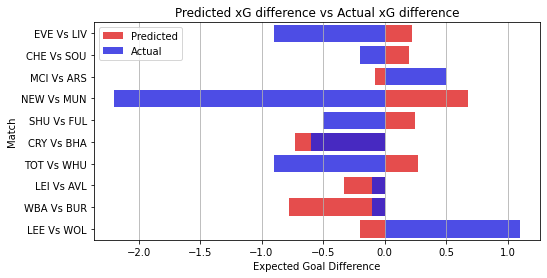

In [24]:
plt.figure(figsize=(8,4))
plt.title("Predicted xG difference vs Actual xG difference")
sns.barplot(y='Match', x='pred_xGD', orient='h',data=df_result, color='red', alpha=0.8
            , label="Predicted")
sns.barplot(y='Match', x='act_xGD', orient='h', data=df_result, color='blue', alpha=0.8
            , label="Actual")
plt.xlabel("Expected Goal Difference")
#plt.xticks(rotation=90)
plt.legend(loc="upper left")
plt.grid(axis='x')
plt.savefig('pred_vs_act.png')
plt.show()

The predictions were in the right direction in only 3 games out of the total 10 games played which was expected as the sample size is very small, other factors not considered and of course due to the inherent uncertainty of the game.
Prediction was most accurate in the Crystal Palace Vs Brighton Game. The away team was predicted to dominate xG, dominate they did with 20 shots against 1 shot from Crystal Palace.
The predictions were highly fallacious in the case of Newcastle vs Man United, Everton vs Liverpool, Spurs vs Hammers and Leeds Vs Wolves.

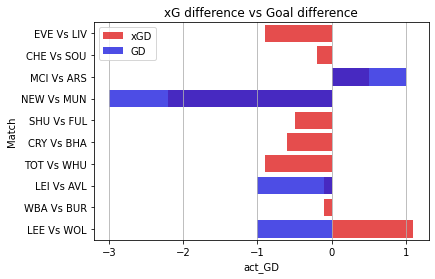

In [25]:
plt.figure(figsize=(6,4))
plt.title("xG difference vs Goal difference")
sns.barplot(y='Match', x='act_xGD', orient='h',data=df_result, color='red', alpha=0.8
            , label="xGD")
sns.barplot(y='Match', x='act_GD', orient='h', data=df_result, color='blue', alpha=0.8
            , label="GD")
#plt.ylabel("Expected Goal Difference")
#plt.xticks(rotation=90)
plt.legend(loc="upper left")
plt.grid(axis='x')
plt.show()

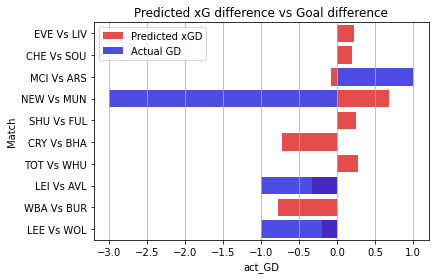

In [26]:
plt.figure(figsize=(6,4))
plt.title("Predicted xG difference vs Goal difference")
sns.barplot(y='Match', x='pred_xGD', orient='h',data=df_result, color='red', alpha=0.8
            , label="Predicted xGD")
sns.barplot(y='Match', x='act_GD', orient='h', data=df_result, color='blue', alpha=0.8
            , label="Actual GD")
#plt.ylabel("Expected Goal Difference")
#plt.xticks(rotation=90)
plt.legend(loc="upper left")
plt.grid(axis='x')
plt.show()

Teams which over performed the predicted xG are above the line whereas, teams with underperformed with respect to the predicted xG are below the line.
Manchester United has over performed their predicted xG by very high margin. Their xG predicted was low as the sample size was just 3 games where they played Crystal Palace(one of the best defensive side), Brighton and Spurs (with 10 men). Their xG would improve as the season progress.


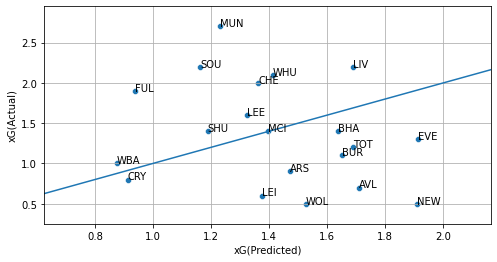

In [27]:
team=[]
pred_xG=[]
act_xG=[]
team.extend(df_result.Home)
team.extend(df_result.Away)

pred_xG.extend(df_result.pred_xG_Home)
pred_xG.extend(df_result.pred_xG_Away)

act_xG.extend(df_result.act_xG_Home)
act_xG.extend(df_result.act_xG_Away)

df_temp=pd.DataFrame({'team':team,'pred_xG':pred_xG,'act_xG':act_xG})

plt.figure(figsize=(8,4))
sns.scatterplot(data=df_temp, x='pred_xG', y='act_xG')
plt.plot([0,3],[0,3])
plt.xlim(df_temp.pred_xG.min()-0.25,df_temp.pred_xG.max()+0.25)
plt.ylim(df_temp.act_xG.min()-0.25,df_temp.act_xG.max()+0.25)
for i in range(df_temp.shape[0]):
    plt.text(df_temp.pred_xG[i],y=df_temp.act_xG[i],s=df_temp.team[i])
plt.grid(axis='both', which='major')
plt.xlabel("xG(Predicted)")
plt.ylabel("xG(Actual)")
plt.savefig("pred_vs_act_xg.png")
plt.show()

In [28]:
df_temp.corr()

,pred_xG,act_xG
pred_xG,1.000000,-0.246363
act_xG,-0.246363,1.000000
